In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import numpy as np
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
def get_annotation_json(path):
    with open(path, 'r') as file:
        data = json.load(file)
        annotations = data.get("annotations", [])
        images = data.get("images", [])
        categories = data.get("categories", [])
    return annotations, images, categories

def build_stat_dict(dataset_a, dataset_b):
    dataset_a['annotations'], dataset_a['images'], dataset_a['categories'] = get_annotation_json(dataset_a['annotation_path'])
    dataset_b['annotations'], dataset_b['images'], dataset_b['categories'] = get_annotation_json(dataset_b['annotation_path'])

    stat_dict = {
        dataset_a['name']: {"middle_points": {item['name']: [] for item in dataset_a['categories']}, "size": {item['name']: [] for item in dataset_a['categories']}},
        dataset_b['name']: {"middle_points": {item['name']: [] for item in dataset_b['categories']}, "size": {item['name']: [] for item in dataset_b['categories']}},
    }

    for dataset in [dataset_a, dataset_b]:
        for element in dataset['annotations']:
            x_min, y_min, width, height = element['bbox']
            x_max = x_min + width
            y_max = y_min + height

            x_center = ((x_min + x_max) / 2)
            y_center = ((y_min + y_max) / 2)

            image_id = element['image_id']
            class_id = element['category_id']
            class_name = next(item['name'] for item in dataset['categories'] if item['id'] == class_id)

            image_dict = next((d for d in dataset['images'] if d['id'] == image_id), None)
            image_width = image_dict['width']
            image_height = image_dict['height']

            x_center_scaled = x_center / image_width
            y_center_scaled = y_center / image_height

            stat_dict[dataset['name']]['middle_points'][class_name].append([x_center_scaled, y_center_scaled])
            stat_dict[dataset['name']]['size'][class_name].append(element['area'])
    return stat_dict


def build_middlepoints_plot(stat_dict, number_of_classes):
    
    fig, axes = plt.subplots(2, number_of_classes, figsize=(3*number_of_classes, 5))
    i = 0
    for dataset in stat_dict.keys():
        for class_name in stat_dict[dataset]["middle_points"].keys():
            point_list = stat_dict[dataset]["middle_points"][class_name]
            ax = axes.flatten()[i]

            ax.set_xlim(0, 1)
            ax.set_ylim(0, 1)
            ax.invert_yaxis()
            ax.set_xticks([0, 0.5, 1])
            ax.set_yticks([0, 0.5, 1])
            ax.tick_params(axis='both', labelsize=18)

            ax.scatter([point[0] for point in point_list], [point[1] for point in point_list], c='blue', edgecolor='black', s=7, alpha=0.7)

            if i<number_of_classes:
                ax.set_title(class_name, fontsize=28)
            if i%number_of_classes==0:
                ax.set_ylabel(dataset.replace('_', '\n'), rotation=0, fontsize=28)
                ax.yaxis.set_label_coords(-0.5-0.032*number_of_classes, 0.3)

            i = i + 1
    fig.tight_layout()
    plt.savefig(f"/home/stewes/source-free-domain-adaptive-document-layout-analysis/Visualizations/{list(stat_dict.keys())[0]}_{list(stat_dict.keys())[1]}_MiddlePoints200.svg", format='svg')
    plt.savefig(f"/home/stewes/source-free-domain-adaptive-document-layout-analysis/Visualizations/{list(stat_dict.keys())[0]}_{list(stat_dict.keys())[1]}_MiddlePoints200.png", dpi=200)
    plt.savefig(f"/home/stewes/source-free-domain-adaptive-document-layout-analysis/Visualizations/{list(stat_dict.keys())[0]}_{list(stat_dict.keys())[1]}_MiddlePoints1000.png", dpi=1000)

def build_size_distribution_plot(stat_dict, number_of_classes):
    fig, axes = plt.subplots(2, number_of_classes, figsize=(3*number_of_classes, 5))
    i = 0
    for dataset in stat_dict.keys():
        for class_name in stat_dict[dataset]["size"].keys():
            size_list = stat_dict[dataset]["size"][class_name]
            ax = axes.flatten()[i]

            ax.hist(size_list, bins=80, color='blue', alpha=0.7, density=True)
            sns.kdeplot(size_list, ax=ax, color="red", shade=True, linewidth=2, warn_singular=False)

            if i<number_of_classes:
                ax.set_title(class_name, fontsize=28)
            if i%number_of_classes==0:
                ax.set_ylabel(dataset.replace('_', '\n'), rotation=0, fontsize=28)
                ax.yaxis.set_label_coords(-0.5-0.032*number_of_classes, 0.3)     
            
            ax.tick_params(axis='x', labelsize=18)
            ax.tick_params(axis='y', labelsize=18)
            ax.locator_params(axis='x', nbins=2)
            ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
            ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
            ax.yaxis.offsetText.set_fontsize(18)

            i = i + 1
    fig.tight_layout()
    plt.savefig(f"/home/stewes/source-free-domain-adaptive-document-layout-analysis/Visualizations/{list(stat_dict.keys())[0]}_{list(stat_dict.keys())[1]}_Size200.svg", format='svg')

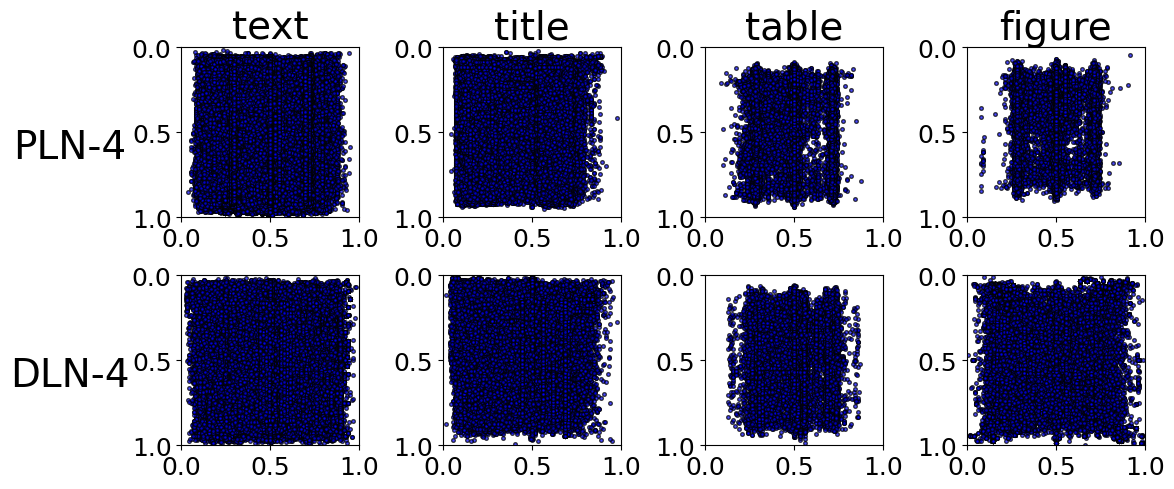

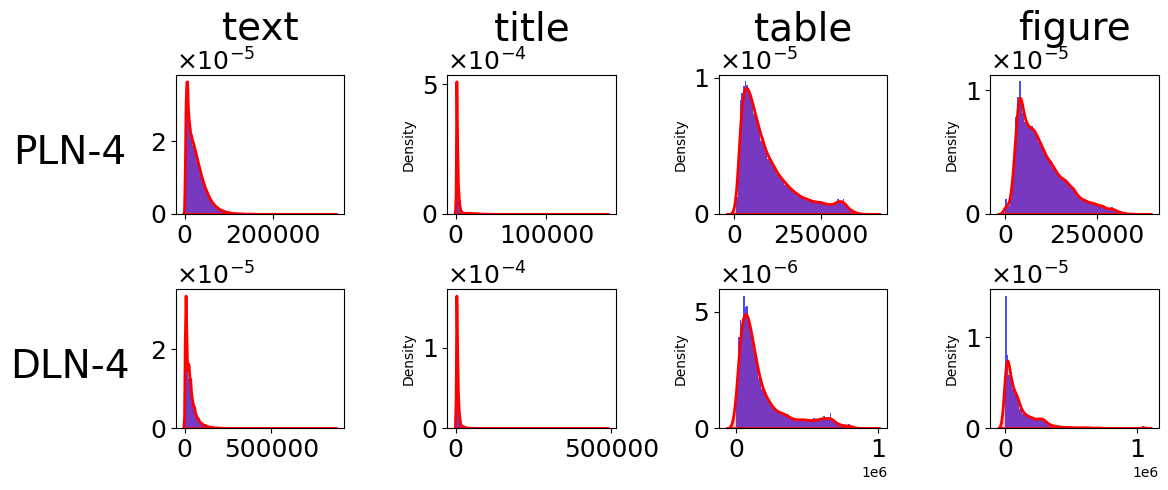

In [3]:
split = "train"

dataset_a = {
    'annotation_path': f"/cvhci/temp/stewes/converted_coco_annotation_files/PLN_with_4_Classes_{split}.json",
    'name': "PLN-4"
}
dataset_b = {
    'annotation_path': f"/cvhci/temp/stewes/converted_coco_annotation_files/DLN_with_4_Classes_{split}.json",
    'name': "DLN-4"
}
number_of_classes = 4

stat_dict = build_stat_dict(dataset_a, dataset_b)
build_middlepoints_plot(stat_dict, number_of_classes)
build_size_distribution_plot(stat_dict, number_of_classes)

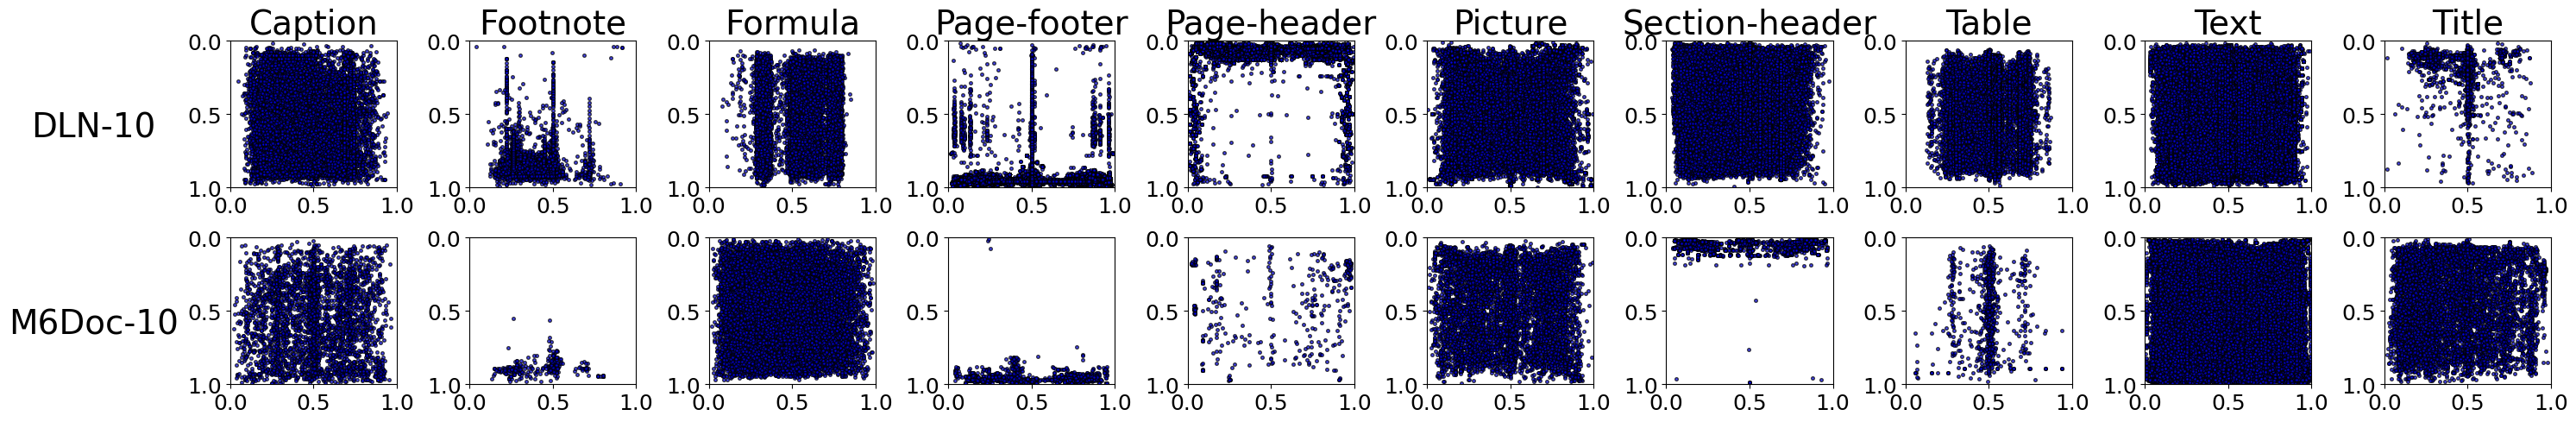

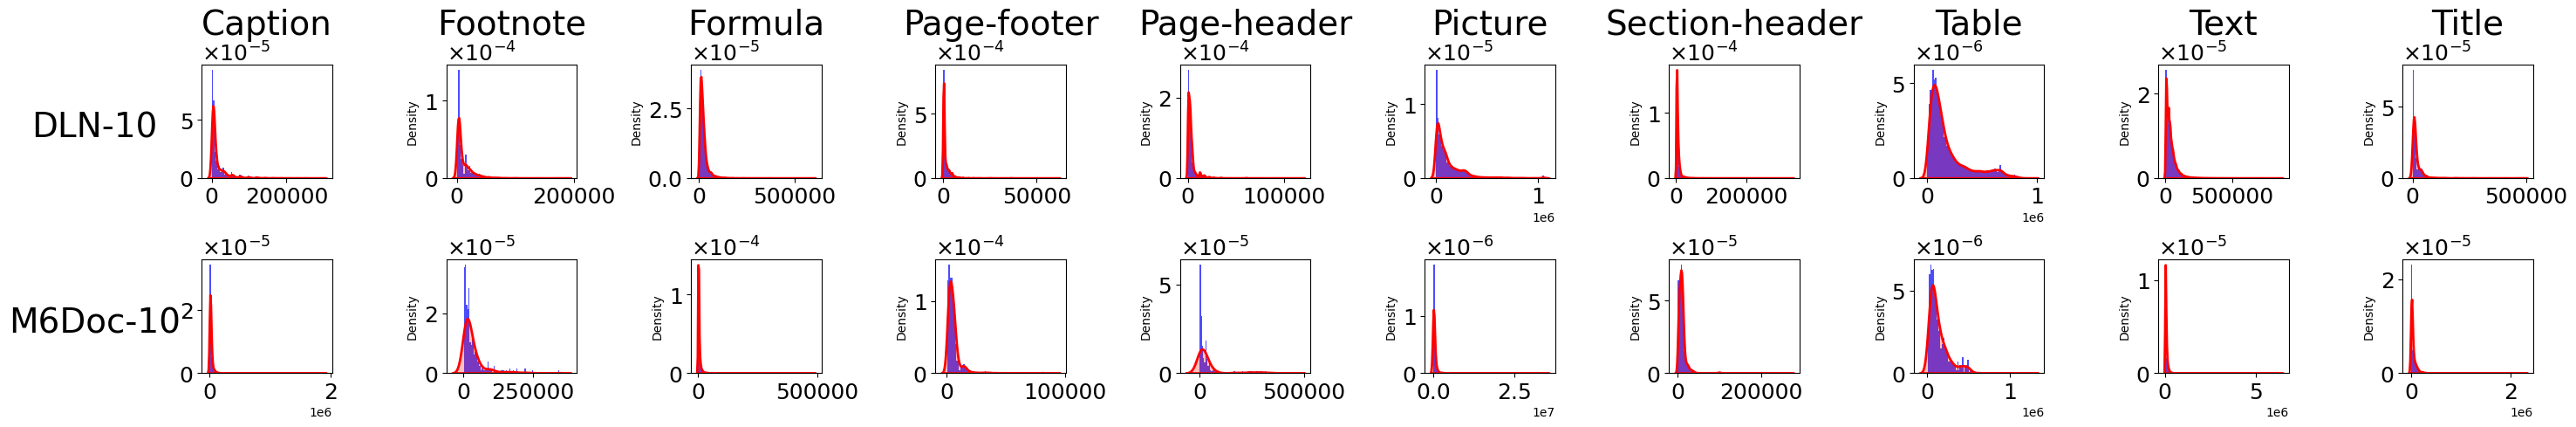

In [4]:
split = "train"

dataset_a = {
    'annotation_path': f"/cvhci/temp/stewes/converted_coco_annotation_files/DLN_with_10_Classes_{split}.json",
    'name': "DLN-10"
}
dataset_b = {
    'annotation_path': f"/cvhci/temp/stewes/converted_coco_annotation_files/M6Doc_with_10_Classes_{split}.json",
    'name': "M6Doc-10"
}
number_of_classes = 10

stat_dict = build_stat_dict(dataset_a, dataset_b)
build_middlepoints_plot(stat_dict, number_of_classes)
build_size_distribution_plot(stat_dict, number_of_classes)